In [2]:
import csv
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#defining filedirectory
fileDir = os.path.dirname(os.path.realpath('__file__'))

In [4]:
#defining data frames
dfLoanData = pd.DataFrame()
dfRejLoanData = pd.DataFrame()

In [5]:
#reading clean-data from csv
for directory, subdirectory, filenames in  os.walk(fileDir + '/CleanedData'):
    for filename in filenames:
        if filename == 'LoanData.csv':
            print("Reading from a file: " + filename + '....')
            dfLoanData = pd.read_csv(os.path.join(directory, filename), encoding = 'ISO-8859-1')
        else:
            print("Reading from a file: " + filename + '....')
            dfRejLoanData = pd.read_csv(os.path.join(directory, filename), encoding = 'ISO-8859-1')

Reading from a file: LoanData.csv....
Reading from a file: LoanDeclinedData.csv....


In [6]:
#creating copies of data frames
dfApproved = dfLoanData.copy()
dfDeclined = dfRejLoanData.copy()

In [7]:
#colums to be selected
select_cols_Loans = ['loan_amnt', 'dti', 'addr_state', 'emp_length', 'issue_year', 'Credit_Score_Code']
select_cols_rejLoans = ['Amount Requested', 'Debt-To-Income Ratio', 'State', 'Employment Length', 'Application Year', 'RiskCategories_Code']
columns = ['AmountRequested', 'DTI', 'State', 'EMPLength', 'AppYear', 'CatScore', 'LoanApproval']

In [8]:
#subsetting the data frame to select few columns
dfApproved = dfApproved[select_cols_Loans]
dfDeclined = dfDeclined[select_cols_rejLoans]

In [9]:
#creating another column to indicate if loan was approved
dfApproved['LoanApproval'] = 1
dfDeclined['LoanApproval'] = 0

In [10]:
#renaming the columns of DF
dfApproved.columns = columns
dfDeclined.columns = columns

In [11]:
#combining the two DFs
dfApplications = pd.concat([dfApproved, dfDeclined], ignore_index=True)

In [12]:
#converting to category
dfApplications['StateCode'] = (dfApplications['State']).astype('category')

#converting all the category columns to int by taking category-code
cat_columns = dfApplications.select_dtypes(['category']).columns
dfApplications[cat_columns] = dfApplications[cat_columns].apply(lambda x: x.cat.codes)

In [13]:
#dividing the DF into two for test & train data
from sklearn.model_selection import train_test_split
train_apps, test_apps = train_test_split(dfApplications, test_size = 0.3)

In [14]:
#inputs required for classification
columns = ['AmountRequested', 'DTI', 'StateCode', 'EMPLength', 'AppYear', 'CatScore']
#train_num_df_X
train_X = train_apps[columns] 
#delinquent_train_y
train_y = train_apps['LoanApproval']


#test_num_df_X
test_X = test_apps[columns]
#delinquent_test_y
test_y = test_apps['LoanApproval']

# Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [16]:
#defining the model
model = LogisticRegression()

In [17]:
#training the train_X data on the model
model = model.fit(train_X,train_y)

In [18]:
#predecting 'LoanApproval' for train_X & test_X data
train_y_predicted = model.predict(train_X)
test_y_predicted = model.predict(test_X)

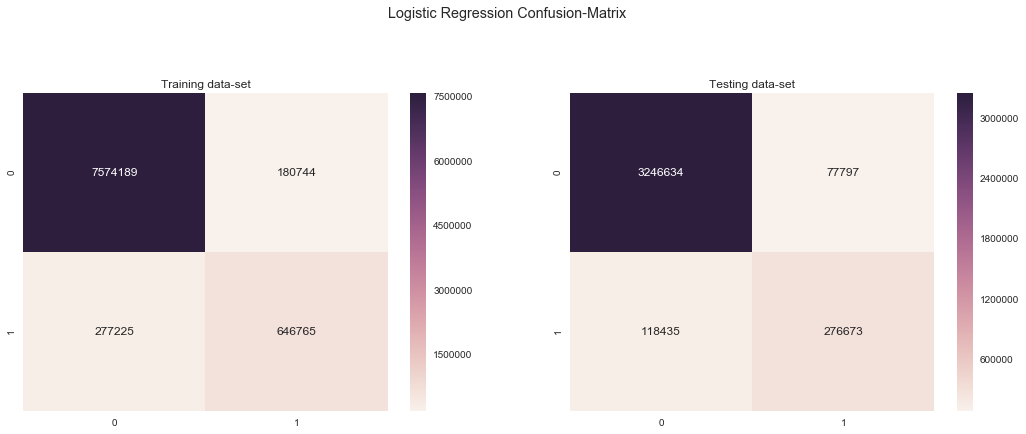

In [19]:
#preparing Confusion-matrix for train_X & test_X data
logistic_reg_conf_matrix_train = metrics.confusion_matrix(train_y, train_y_predicted)
logistic_reg_conf_matrix_test = metrics.confusion_matrix(test_y, test_y_predicted)

#plot on Confusion-matrix heatmap
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Logistic Regression Confusion-Matrix')
plt.subplot(2, 2, 1)
plt.title('Training data-set');
sns.heatmap(logistic_reg_conf_matrix_train, annot=True,  fmt='d');

plt.subplot(2, 2, 2)
plt.title('Testing data-set');
sns.heatmap(logistic_reg_conf_matrix_test, annot=True,  fmt='d');

plt.show()

In [20]:
#calculating accuracy score
logistic_reg_acc_matrix_train = metrics.accuracy_score(train_y, train_y_predicted)
logistic_reg_acc_matrix_test = metrics.accuracy_score(test_y, test_y_predicted)
print('Logistic Regression accuracy')
print('Training data : ',logistic_reg_acc_matrix_train)
print('Testing data : ',logistic_reg_acc_matrix_test)

Logistic Regression accuracy
Training data :  0.94723204711
Testing data :  0.947242924459


In [21]:
#generating classification report
print('Logistic Regression classification reprot')

logistic_reg_class_report_train = metrics.classification_report(train_y, train_y_predicted)
print('Training data')
print(logistic_reg_class_report_train)

logistic_reg_class_report_test = metrics.classification_report(test_y, test_y_predicted)
print('Testing data')
print(logistic_reg_class_report_test)

Logistic Regression classification reprot
Training data
             precision    recall  f1-score   support

          0       0.96      0.98      0.97   7754933
          1       0.78      0.70      0.74    923990

avg / total       0.95      0.95      0.95   8678923

Testing data
             precision    recall  f1-score   support

          0       0.96      0.98      0.97   3324431
          1       0.78      0.70      0.74    395108

avg / total       0.95      0.95      0.95   3719539



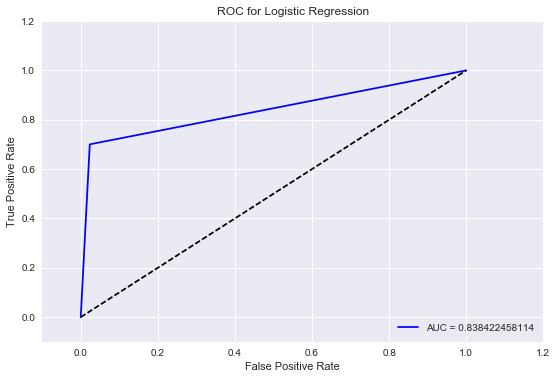

In [22]:
#plotting of ROC Curve for testing data
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_y_predicted)
logistic_reg_auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.title("ROC for Logistic Regression")
label_auc = 'AUC = '+str(logistic_reg_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b', label=label_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [24]:
#defining the model
model = RandomForestClassifier(n_estimators = 10)

In [25]:
#training the train_X data on the model
model = model.fit(train_X,train_y)

In [26]:
#predecting 'LoanApproval' for train_X & test_X data
train_y_predicted = model.predict(train_X)
test_y_predicted = model.predict(test_X)

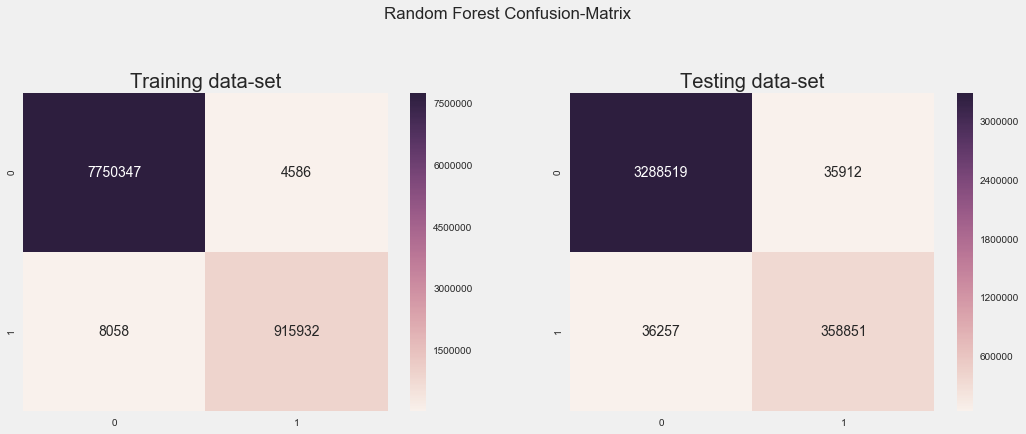

In [27]:
#preparing Confusion-matrix for train_X & test_X data
random_forest_conf_matrix_train = metrics.confusion_matrix(train_y, train_y_predicted)
random_forest_conf_matrix_test = metrics.confusion_matrix(test_y, test_y_predicted)

#plot on Confusion-matrix heatmap
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Random Forest Confusion-Matrix')
plt.subplot(2, 2, 1)
plt.title('Training data-set');
sns.heatmap(random_forest_conf_matrix_train, annot=True,  fmt='d');

plt.subplot(2, 2, 2)
plt.title('Testing data-set');
sns.heatmap(random_forest_conf_matrix_test, annot=True,  fmt='d');

plt.show()

In [28]:
#calculating accuracy score
random_forest_acc_matrix_train = metrics.accuracy_score(train_y, train_y_predicted)
random_forest_acc_matrix_test = metrics.accuracy_score(test_y, test_y_predicted)
print('Random Forest accuracy')
print('Training data : ',random_forest_acc_matrix_train)
print('Testing data : ',random_forest_acc_matrix_test)

Random Forest accuracy
Training data :  0.998543137207
Testing data :  0.980597326712


In [29]:
#generating classification report
print('Random Forest classification reprot')

random_forest_class_report_train = metrics.classification_report(train_y, train_y_predicted)
print('Training data')
print(random_forest_class_report_train)

random_forest_class_report_test = metrics.classification_report(test_y, test_y_predicted)
print('Testing data')
print(random_forest_class_report_test)

Random Forest classification reprot
Training data
             precision    recall  f1-score   support

          0       1.00      1.00      1.00   7754933
          1       1.00      0.99      0.99    923990

avg / total       1.00      1.00      1.00   8678923

Testing data
             precision    recall  f1-score   support

          0       0.99      0.99      0.99   3324431
          1       0.91      0.91      0.91    395108

avg / total       0.98      0.98      0.98   3719539



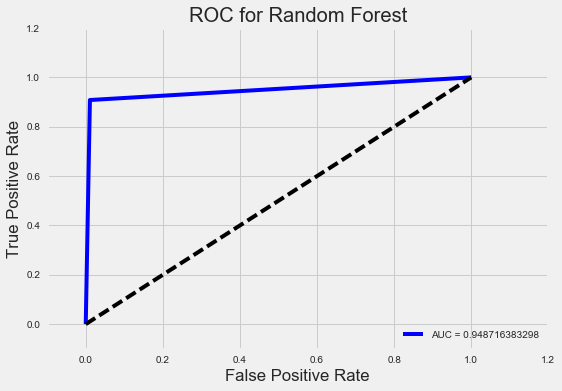

In [30]:
#plotting of ROC Curve for testing data
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_y_predicted)
random_forest_auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.title("ROC for Random Forest")
label_auc = 'AUC = '+str(random_forest_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b', label=label_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Neural Network models

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [35]:
#defining a model
model = MLPClassifier(solver='sgd',learning_rate_init=0.01,max_iter=500)

In [ ]:
#training the train_X data on the model
model = model.fit(train_X,train_y)

In [ ]:
#predecting 'LoanApproval' for train_X & test_X data
train_y_predicted = model.predict(train_X)
test_y_predicted = model.predict(test_X)

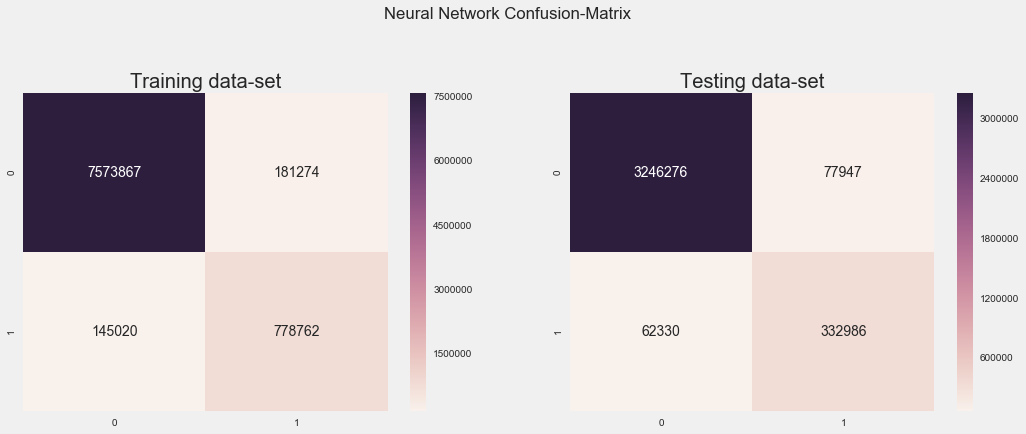

In [ ]:
#preparing Confusion-matrix for train_X & test_X data
neural_network_conf_matrix_train = metrics.confusion_matrix(train_y, train_y_predicted)
neural_network_conf_matrix_test = metrics.confusion_matrix(test_y, test_y_predicted)

#plot on Confusion-matrix heatmap
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Neural Network Confusion-Matrix')
plt.subplot(2, 2, 1)
plt.title('Training data-set');
sns.heatmap(neural_network_conf_matrix_train, annot=True,  fmt='d');

plt.subplot(2, 2, 2)
plt.title('Testing data-set');
sns.heatmap(neural_network_conf_matrix_test, annot=True,  fmt='d');

plt.show()

In [ ]:
#calculating accuracy score
neural_network_acc_matrix_train = metrics.accuracy_score(train_y, train_y_predicted)
neural_network_acc_matrix_test = metrics.accuracy_score(test_y, test_y_predicted)
print('Neural Network accuracy')
print('Training data : ',neural_network_acc_matrix_train)
print('Testing data : ',neural_network_acc_matrix_test)

Neural Network accuracy
Training data :  0.962403860479
Testing data :  0.962286455391


In [ ]:
#generating classification report
print('Neural Network classification reprot')

neural_network_class_report_train = metrics.classification_report(train_y, train_y_predicted)
print('Training data')
print(neural_network_class_report_train)

neural_network_class_report_test = metrics.classification_report(test_y, test_y_predicted)
print('Testing data')
print(neural_network_class_report_test)

Neural Network classification reprot
Training data
             precision    recall  f1-score   support

          0       0.98      0.98      0.98   7755141
          1       0.81      0.84      0.83    923782

avg / total       0.96      0.96      0.96   8678923

Testing data
             precision    recall  f1-score   support

          0       0.98      0.98      0.98   3324223
          1       0.81      0.84      0.83    395316

avg / total       0.96      0.96      0.96   3719539



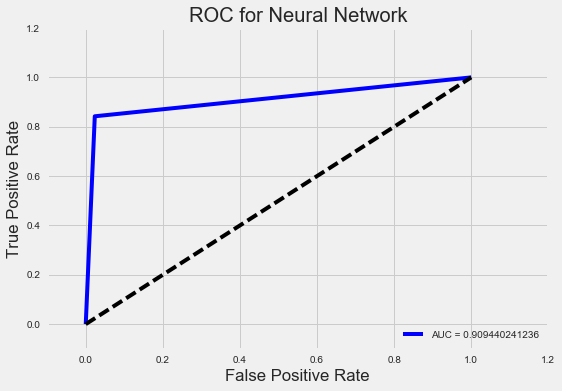

In [ ]:
#plotting of ROC Curve for testing data
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_y_predicted)
neural_network_auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.title("ROC for Neural Network")
label_auc = 'AUC = '+str(neural_network_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b', label=label_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:
#defining a model
model = svm.LinearSVC(C=1)

In [ ]:
#training the train_X data on the model
model = model.fit(train_X,train_y)

In [ ]:
#predecting 'LoanApproval' for train_X & test_X data
train_y_predicted = model.predict(train_X)
test_y_predicted = model.predict(test_X)

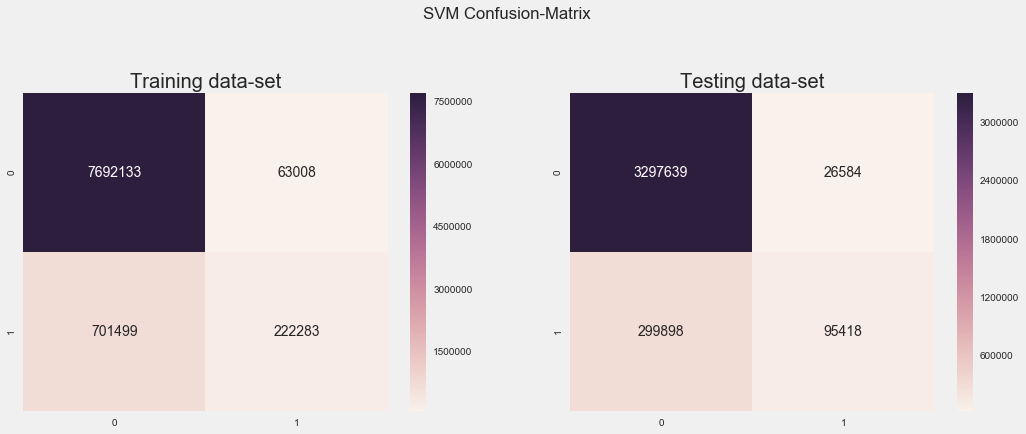

In [ ]:
#preparing Confusion-matrix for train_X & test_X data
SVM_conf_matrix_train = metrics.confusion_matrix(train_y, train_y_predicted)
SVM_conf_matrix_test = metrics.confusion_matrix(test_y, test_y_predicted)

#plot on Confusion-matrix heatmap
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('SVM Confusion-Matrix')
plt.subplot(2, 2, 1)
plt.title('Training data-set');
sns.heatmap(SVM_conf_matrix_train, annot=True,  fmt='d');

plt.subplot(2, 2, 2)
plt.title('Testing data-set');
sns.heatmap(SVM_conf_matrix_test, annot=True,  fmt='d');

plt.show()

In [ ]:
#calculating accuracy score
SVM_acc_matrix_train = metrics.accuracy_score(train_y, train_y_predicted)
SVM_acc_matrix_test = metrics.accuracy_score(test_y, test_y_predicted)
print('SVM accuracy')
print('Training data : ',SVM_acc_matrix_train)
print('Testing data : ',SVM_acc_matrix_test)

SVM accuracy
Training data :  0.911912226897
Testing data :  0.91222514403


In [ ]:
#generating classification report
print('SVM classification reprot')

SVM_class_report_train = metrics.classification_report(train_y, train_y_predicted)
print('Training data')
print(SVM_class_report_train)

SVM_class_report_test = metrics.classification_report(test_y, test_y_predicted)
print('Testing data')
print(SVM_class_report_test)

SVM classification reprot
Training data
             precision    recall  f1-score   support

          0       0.92      0.99      0.95   7755141
          1       0.78      0.24      0.37    923782

avg / total       0.90      0.91      0.89   8678923

Testing data
             precision    recall  f1-score   support

          0       0.92      0.99      0.95   3324223
          1       0.78      0.24      0.37    395316

avg / total       0.90      0.91      0.89   3719539



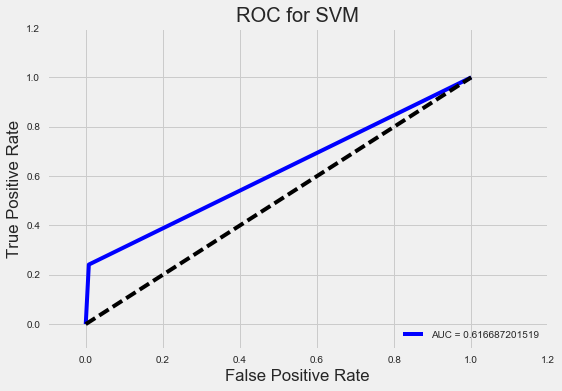

In [ ]:
#plotting of ROC Curve for testing data
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_y_predicted)
SVM_auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.title("ROC for SVM")
label_auc = 'AUC = '+str(SVM_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b', label=label_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()